In [1]:
import numpy as np
import pandas as pd

In [4]:
!pip install matplotlib

In [5]:
!pip install seaborn

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
!pip install tensorflow

In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [19]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [43]:
len_train=len(X_train) # no of sample in x_train

In [44]:
len_test=len(X_test) # no of sample in x_test

In [45]:
X_train[1] #2-D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [46]:
X_train[1].shape #pixel of sample

(28, 28)

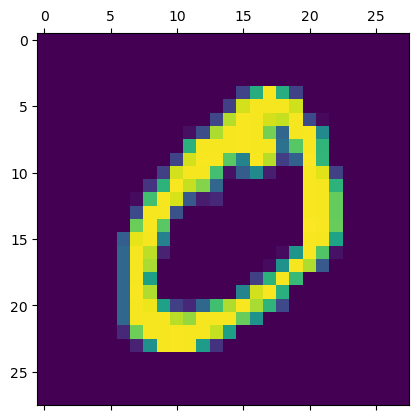

In [47]:
plt.matshow(X_train[1]) #2nd training image

In [48]:
y_train[1] 

0

In [49]:
y_train[:5] 

array([5, 0, 4, 1, 9], dtype=uint8)

In [58]:
#for scalling th emodel to get better accuracy
X_train=X_train/255
X_test=X_test/255

In [59]:
X_train_flattened=X_train.reshape(len_train,28*28) #reshape x_train from 2D to 1D
X_test_flattened=X_test.reshape(len_test,28*28) #reshape x_test from 2D to 1D

In [60]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [61]:
X_train_flattened[1] #1D array 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
#accuracy on train dataset
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])  #10(0-9)->output size 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8097 - loss: 0.7185
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9118 - loss: 0.3165
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9204 - loss: 0.2853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9239 - loss: 0.2720
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9249 - loss: 0.2673


In [64]:
#accuracy on test dataset
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9139 - loss: 0.3058


[0.26814979314804077, 0.9247000217437744]

In [65]:
#sample prediction
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.9771103e-02, 3.3905786e-07, 5.7935625e-02, ..., 9.9983281e-01,
        1.0373001e-01, 6.8043065e-01],
       [3.6969426e-01, 2.7628238e-03, 9.9892122e-01, ..., 8.0821959e-13,
        1.3127229e-01, 5.0999747e-09],
       [2.7275152e-04, 9.9427956e-01, 6.2783325e-01, ..., 1.1829790e-01,
        3.2460931e-01, 4.3827392e-02],
       ...,
       [2.7239362e-06, 5.2370001e-06, 7.1222644e-04, ..., 2.6511890e-01,
        4.5670253e-01, 7.5307953e-01],
       [8.2280960e-05, 1.8380387e-04, 1.1613454e-04, ..., 3.2546210e-05,
        6.0862637e-01, 1.2528589e-04],
       [6.7996886e-03, 1.9500498e-10, 8.6292610e-02, ..., 1.2279227e-08,
        1.5697099e-04, 1.1331998e-06]], dtype=float32)

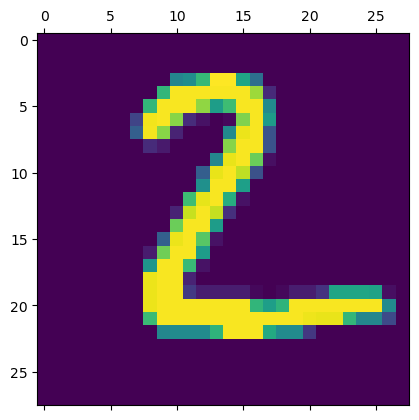

In [67]:
plt.matshow(X_test[1]) #2nd data in test 

In [68]:
y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [69]:
y_predicted[1] #whole no

array([3.6969426e-01, 2.7628238e-03, 9.9892122e-01, 3.5192332e-01,
       5.8645033e-10, 7.7463406e-01, 8.8818443e-01, 8.0821959e-13,
       1.3127229e-01, 5.0999747e-09], dtype=float32)

In [71]:
np.argmax(y_predicted[1])

2

In [72]:
y_test[:5] #int

array([7, 2, 1, 0, 4], dtype=uint8)

In [75]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]#convert y_predicted to int no
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [85]:
#build confusion matrix 
#labels:truth data
confusion_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    7,    2,    2,    1],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   7,   10,  908,   25,   13,    4,   13,   11,   37,    4],
       [   2,    0,   14,  938,    0,   19,    3,   11,   15,    8],
       [   1,    2,    2,    1,  915,    0,   12,    4,    8,   37],
       [  10,    3,    1,   43,   11,  763,   17,    8,   29,    7],
       [  10,    3,    2,    2,    7,   10,  921,    2,    1,    0],
       [   1,    6,   21,    7,    9,    0,    0,  951,    2,   31],
       [   6,   12,    7,   30,    9,   24,    9,   13,  853,   11],
       [  11,    7,    1,   10,   26,    5,    0,   25,    5,  919]])>

In [90]:
!pip install seaborn --upgrade

Text(95.72222222222221, 0.5, 'TRUTH')

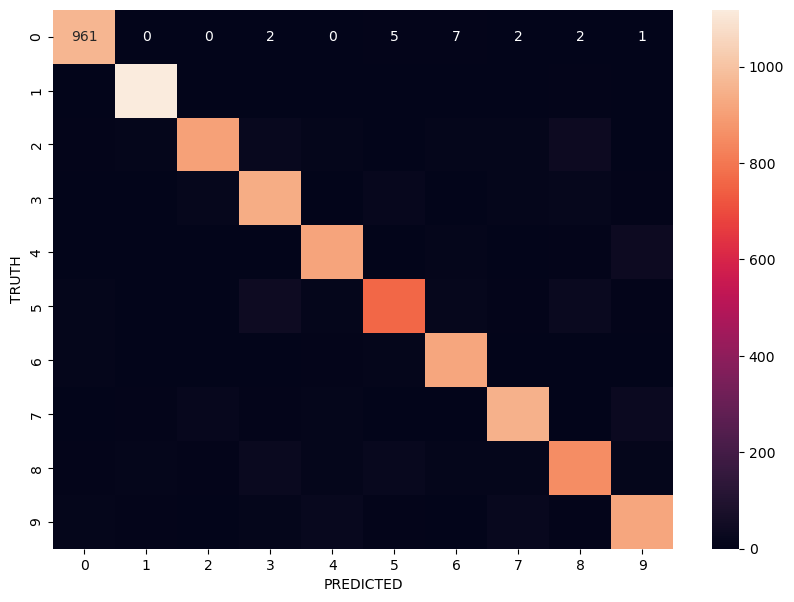

In [93]:
#without diagonals all values are error
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_mat,annot=True,fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

In [98]:
#improvement of accuracy on train dataset using hidden layer
model = keras.Sequential([
    keras.layers.Dense(100,activation='relu'), #100 ->no of nurons 
    keras.layers.Dense(10,activation='sigmoid')
])   

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8713 - loss: 0.4515
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9617 - loss: 0.1312
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9753 - loss: 0.0843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9812 - loss: 0.0608
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9854 - loss: 0.0494


In [99]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0843


[0.07335024327039719, 0.9768000245094299]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

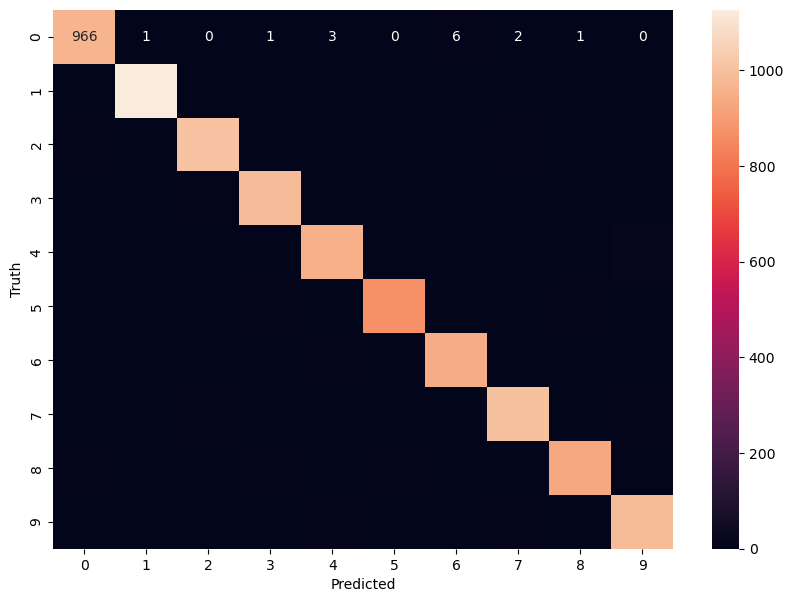

In [100]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [102]:
#without X_train_flattened use flatter layeer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100,activation='relu'), #100 ->no of nurons 
    keras.layers.Dense(10,activation='sigmoid')
])   

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8749 - loss: 0.4518
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9615 - loss: 0.1340
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9730 - loss: 0.0916
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9789 - loss: 0.0696
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9849 - loss: 0.0508
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0438
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9894 - loss: 0.0344
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9916 - loss: 0.0281
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9929 - loss: 0.0233
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9951 - loss: 0.0177


In [103]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.1057


[0.08696967363357544, 0.9768999814987183]

In [109]:
#accuracy decreasing
model = keras.Sequential([
    keras.layers.Dense(100,activation='relu'), #100 ->no of nurons 
    keras.layers.Dense(10,activation='sigmoid')
])   

model.compile(optimizer='lion',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8803 - loss: 0.4238
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9484 - loss: 0.1864
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9535 - loss: 0.1704
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9574 - loss: 0.1647
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9591 - loss: 0.1633
